In [7]:
#!/usr/bin/env python
# coding: utf8
import json
import pandas as pd
import os

In [8]:
def loadcorpus(title, abstract):
    covid_paper_data=[]
    if title is not '':
        covid_paper_data.append(title)
    if abstract is not '':
        #clean the “abstract” which not belongs to the abstract mainbody text
        if abstract.lower().startswith('abstract '):
            abstract = abstract[9:]
        elif abstract.lower().startswith('abstract'):
            abstract = abstract[8:]
        if abstract.lower().startswith('summary '):
            abstract = abstract[8:]
        elif abstract.lower().startswith('summary'):
            abstract = abstract[7:]
        elif abstract.lower().startswith('summary: '):
            abstract = abstract[9:]
        line = abstract.split('. ')
        if line is not '':
            covid_paper_data.extend(line)
    return covid_paper_data

In [9]:
data_path = "/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge"
metadata_path = os.path.join(data_path,"metadata.csv")
meta_df = pd.read_csv(metadata_path, encoding='utf-8', dtype={
    'cord_uid': str,
    'doi': str,
    'sha': str,
    'title': str,
    'abstract': str
})
print(meta_df.shape) #up to latest release, total papers num: 51078
meta_df.head(2)

(51078, 18)


cord_uid                                       sha source_x  \
0  xqhn0vbp  1e1286db212100993d03cc22374b624f7caee956      PMC   
1  gi6uaa83  8ae137c8da1607b3a8e4c946c07ca8bda67f88ac      PMC   

                                               title                      doi  \
0  Airborne rhinovirus detection and effect of ul...    10.1186/1471-2458-3-5   
1    Discovering human history from stomach bacteria  10.1186/gb-2003-4-5-213   

       pmcid   pubmed_id license  \
0  PMC140314  12525263.0   no-cc   
1  PMC156578  12734001.0   no-cc   

                                            abstract publish_time  \
0  BACKGROUND: Rhinovirus, the most common cause ...   2003-01-13   
1  Recent analyses of human pathogens have reveal...   2003-04-28   

                                             authors            journal  \
0  Myatt, Theodore A; Johnston, Sebastian L; Rudn...  BMC Public Health   
1                                   Disotell, Todd R        Genome Biol   

   Microsoft Academic Paper ID WHO #Covidence  has_pdf_parse  \
0                          NaN            NaN           True   
1                          NaN            NaN           True   

   has_pmc_xml_parse  full_text_file  \
0               True  custom_license   
1               True  custom_license   

                                                 url  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...

In [10]:
'''
extract COVID-19 related papers
key words: COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV
We will processe all covid19 related paper and output recognition results in working directory.
'''
meta_df_title_abstract = meta_df[['cord_uid','doi','sha','title','abstract','publish_time']].fillna('') #process na
s_covid_title = meta_df_title_abstract.title.str.contains('COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV') #1780
s_covid_abstract = meta_df_title_abstract.abstract.str.contains('COVID-19|Coronavirus disease 2019|Coronavirus Disease 2019|2019 novel coronavirus|2019 new coronavirus|SARS-CoV-2|SARS Coronavirus 2|Wuhan pneumonia|2019-nCoV') #1611
covid_bool = s_covid_title | s_covid_abstract  # the papers' title or abstract related to COVID-19 
covid_papers = meta_df_title_abstract[covid_bool]
print(covid_papers.shape) #among all papers, the number of COVID-19 related papers: 3455
covid_papers.head()

(3455, 6)


cord_uid                                     doi  \
11988  wvx6q999  10.2807/1560-7917.es.2020.25.3.2001231   
12213  uk8rfroj                    10.1128/mra.00169-20   
12214  ivwn4nhl  10.2807/1560-7917.es.2020.25.9.2000178   
12219  hb2aaa29              10.1186/s12916-020-01551-8   
12229  4yuw7jo3               10.1038/s41421-020-0153-3   

                                            sha  \
11988  d958168df85240e544a918d843a14e887dc41d2b   
12213  b5d303cbcfe6be92d733ec593118b388db77452e   
12214  ce358c18aac69fc83c7b2e9a7dca4a43b0f60e2e   
12219  a1f9e6d1c2717f4555275f25d6169063b7f8bb23   
12229  418538e40e195b8a0c7669b3a005ebcdb6a325c3   

                                                   title  \
11988  Note from the editors: novel coronavirus (2019...   
12213  Complete Genome Sequence of a 2019 Novel Coron...   
12214  First cases of coronavirus disease 2019 (COVID...   
12219  What further should be done to control COVID-1...   
12229  Network-based drug repurposing for novel coron...   

                                                abstract publish_time  
11988                                                      2020-01-23  
12213  A complete genome sequence was obtained for a ...   2020-03-12  
12214  In the WHO European Region, COVID-19 surveilla...   2020-03-05  
12219                                                      2020-03-13  
12229  Human coronaviruses (HCoVs), including severe ...   2020-03-16

In [12]:
# all results display are too long
# For result display preview, random sample 10% of covid19 related papers.
covid_papers_sample=covid_papers.sample(frac=0.1, replace=False, random_state=1) 
print(covid_papers_sample.shape)
covid_papers_sample.head()

(346, 6)


cord_uid                            doi  \
33859  m0q7rm6z    10.1101/2020.04.05.20054254   
29921  vdkkcz4k  10.1016/s0140-6736(20)30690-5   
29940  evkywvrj  10.1016/s0140-6736(20)30793-5   
33860  radi0wlh    10.1101/2020.04.05.20054288   
31216  5afxlkvs      10.1016/j.cmi.2020.03.025   

                                            sha  \
33859  b62add31f59fb244e0721a204bdec76888be7e16   
29921  096797c22e471cc23384fd840a53cc6a0f454529   
29940  6db060503ee1a0709ea9d3b8b9969513ab713c06   
33860  781952b55b46350bc31c782515c03743e6095b9a   
31216  75fda70dc20f1d7d650647a03e231110c75a9a06   

                                                   title  \
33859  Repurposing Therapeutics for COVID-19: Rapid P...   
29921             COVID-19 in Europe: the Italian lesson   
29940  Essential care of critical illness must not be...   
33860  Estimating the effect of physical distancing o...   
31216  Molecular characterization of SARS-CoV-2 from ...   

                                                abstract publish_time  
33859  The outbreak of the novel coronavirus disease ...   2020-04-07  
29921                                                      2020-03-24  
29940                                                      2020-04-01  
33860  Governments around the world are implementing ...   2020-04-07  
31216                                                      2020-03-27

In [13]:
%%capture
#A Python biomedical entity recognition and relation extraction package that uses a supervised approach
!pip install kindred

# supervised entity recognition

In [25]:
#!python -m spacy download en

In [14]:
#outdir: "corpus-paper-anno
annotations_tmp_dir = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/corpus-paper-anno'

In [15]:
# Customized dict directory declaration
dict_list_dir = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/dict'
dict_list = (',').join(os.listdir(dict_list_dir))
print(dict_list)

pathologic.txt,protein.txt,drug.txt,risk_factors.txt,disease.txt,nucleotide_mutation.txt,organ.txt,transmission.txt,diagnosis.txt,strain.txt,aa_mutation.txt,symptoms.txt,gene.txt,treatment.txt,organization.txt,host_human.txt,prevention.txt,structure.txt,host_other.txt,pathogen.txt,location.txt


In [26]:
'''
We use kindred package to implement entitiy recognize based on customized wordlists.
Define a class "NewAnnotate" to init dict libraries, parse paper corpus and implement entity recognition
Add new annotation types("DATE", "GPE", "CARDINAL", "PERCENT") from spacy model entity prediction
'''
import os
import kindred
import spacy
nlp_core = spacy.load("en")
nlp_need_tags = set(['DATE','GPE','CARDINAL','PERCENT'])
import bisect

class NewAnnotate(object):
    def __init__(self, ner_out_dir, corpus_text, corpus_name, dictlists, dictlist_dir):
        self.ner_out_dir = ner_out_dir
        self.corpus_text = corpus_text
        self.corpus_name = corpus_name
        self.entityRecognizer = None
        self.init_dict_recognizer(dictlists, dictlist_dir)
    
    #Init dict libraries for NER
    def init_dict_recognizer(self, dictlists, dictlist_dir):
        wordlistDict = {}
        for wordlist in dictlists.split(','):
            wordlistpath = os.path.join(dictlist_dir, wordlist)
            assert os.path.isfile(wordlistpath), 'Unable to access file: %s' % wordlistpath
            entityType = os.path.splitext(os.path.basename(wordlistpath))[0]
            wordlistDict[entityType] = wordlistpath
        wordlistLookup = kindred.EntityRecognizer.loadWordlists(wordlistDict, idColumn=0, termsColumn=0)
        self.entityRecognizer = kindred.EntityRecognizer(wordlistLookup)
    
    def addparseWordsUsingSpacyTags(self, _ss, _oldents):
        newents = _oldents
        for nlp_doc in nlp_core.pipe([_ss], disable=["tagger", "parser"]):
            for _ent in nlp_doc.ents:
                if _ent.label_ in nlp_need_tags:
                    already_annotated = False
                    for _oldent in _oldents:
                        if (_oldent[0] >= _ent.start_char and _oldent[0] <= _ent.end_char) or (_oldent[1] >= _ent.start_char and _oldent[1] <= _ent.end_char) or (_ent.start_char >= _oldent[0] and _ent.start_char <= _oldent[1]) or (_ent.end_char >= _oldent[0] and _ent.end_char <= _oldent[1]):
                            already_annotated = True
                            break
                    if not already_annotated:
                        bisect.insort(newents, (_ent.start_char, _ent.end_char, _ent.label_, _ss[_ent.start_char: _ent.end_char]))
                        
        return newents
    
    #implement entity recognize
    def entity_recognize(self):
        parser = kindred.Parser()
        print('begin entity annotate {}'.format(self.corpus_name))
        sentenceCorpus = []
        for ss_corpus_text in self.corpus_text.split(". "):
            ss_corpus = kindred.Corpus(ss_corpus_text)
            parser.parse(ss_corpus)
            self.entityRecognizer.annotate(ss_corpus)
            sentenceCorpus.append(ss_corpus)

        if not os.path.exists(self.ner_out_dir):
            os.makedirs(self.ner_out_dir)
        entity_annotate_output_file = os.path.join(self.ner_out_dir, '{}.entity'.format(self.corpus_name))
        file_out = open(entity_annotate_output_file, 'w', encoding='utf-8')
        for ss_corpus in sentenceCorpus:
            for _doc in ss_corpus.documents:
                file_out.writelines('{}\n'.format(_doc.text.strip().strip('.')))
                _ents = []
                for _entity in _doc.entities:
                    for _pos in _entity.position:
                        #file_out.writelines('{}\t{} {} {}\t{}\n'.format(_entity.sourceEntityID, _entity.entityType, _pos[0], _pos[1], _entity.text))
                        _ents.append((_pos[0], _pos[1], _entity.entityType, _entity.text))
                newents = self.addparseWordsUsingSpacyTags(_doc.text.strip().strip('.'), _ents)
                ei = 1
                for _newent in newents:
                    file_out.writelines('T{}\t{} {} {}\t{}\n'.format(ei, _newent[2], _newent[0], _newent[1], _newent[3]))
                    ei = ei + 1
                file_out.writelines('\n')
        file_out.close()
        print('end entity annotate {} file is {}'.format(self.corpus_name, entity_annotate_output_file))
        return entity_annotate_output_file

In [27]:
'''
    Define a class "AnnoFormat" to save the results in JSON format and render results in HTML format (.json and .html )
    Add save and display of new annotation types("DATE", "GPE", "CARDINAL", "PERCENT")
'''
import json
import os
import re
import spacy

# define the colors and options in HTML render
colors = {"DIAGNOSIS": "#ef5050", "ORGANIZATION": "#F0E68C", "DISEASE": "#FF8888", "LOCATION": "#FFDAB9",
          "PATHOLOGIC": "#FF00D4","SYMPTOMS": "#D2691E", "TREATMENT": "#f172b2", "PATHOGEN": "#7FFFD4",
          "GENE": "#33FFFF","HOST_OTHER": "#00DD77", "HOST_HUMAN": "#1FBC9C", "PROTEIN": "#00BFFF", "STRUCTURE": "#87CEFA",
          "ORGAN":"#FFFF77", "AA_MUTATION":"#801dae", "NUCLEOTIDE_MUTATION":"#cca4e3", "RISK_FACTORS":"#f9906f", "TRANSMISSION":"#b36d61", "DRUG":"#4b5cc4", "STRAIN":"#426666", 
          "DATE":"#FF7766","GPE":"#FFDD55","CARDINAL":"#FF8800","PERCENT":"#FF5511"
          }
options = {"ents": ["DIAGNOSIS", "ORGANIZATION", "DISEASE", "LOCATION", "PATHOLOGIC", "SYMPTOMS", "TREATMENT",
                    "PATHOGEN", "GENE","HOST_HUMAN", "HOST_OTHER", "PROTEIN", "STRUCTURE",
                    "AA_MUTATION", "NUCLEOTIDE_MUTATION", "RISK_FACTORS", "TRANSMISSION", "DRUG", "STRAIN", "ORGAN",
                    "DATE", "GPE", "CARDINAL", "PERCENT"
                    ], "colors": colors}

class AnnoFormat(object):
    def __init__(self, corpus, corpus_format_dir, anno_file, publish_time):
        self.anno_file=anno_file
        self.corpus = corpus
        self.format_outdir = corpus_format_dir
        self.texts = ""
        self.entitys = []
        self.jsonformat = {}
        self.entsjsonformat = {}
        self.ents = []
        self.publish_time = publish_time
        
    def erJsonFormat(self):
        self.jsonformat["text"]=self.texts
        self.jsonformat["title"]=self.corpus
        self.jsonformat["publish_time"]=self.publish_time
        for _entity in self.entitys:
            _entitylineitems=_entity.split("\t")
            _entity_info = _entitylineitems[1].split(" ")
            _current_entity = {}
            if _entity_info[0]=="Title" or _entity_info[0]=="Paragrah":
                continue
            else:
                _current_entity["index"] = _entitylineitems[0]
                _current_entity["start"] = int(_entity_info[1])
                _current_entity["end"] = int(_entity_info[2])
                _current_entity["label"] = _entity_info[0].upper()
                self.ents.append(_current_entity)
        self.jsonformat["ents"]=self.ents
        with open(os.path.join(self.format_outdir, self.corpus + "_ents.json"), 'w', encoding='utf-8') as jsonFile:
            json.dump(self.jsonformat,jsonFile)

    def erHtmlFormat(self):
        renderex=[]
        renderex.append(self.jsonformat)
        html = spacy.displacy.render([self.jsonformat], style="ent", manual=True, options=options, jupyter = False)
        with open(os.path.join(self.format_outdir, self.corpus + "_ents.html"), 'w', encoding='utf-8') as htmlFile:
            html_custom=html.replace('<span style="', '<span style="color:#666666;')
            htmlFile.write(html_custom)

    def erParseFormat(self):
        with open(self.anno_file, encoding='utf-8')as f:
            content = f.readlines()
            p = re.compile('^(T\d+\t)*')  # match example: "T1	pathogen 38 51	Coronaviruses"
            global_offset = 0
            current_offset = 0
            entity_index = 0
            for _line in content:
                _line=_line.strip()
                if len(p.findall(_line)[0]) > 0: # is an entity line
                    entity_index = entity_index + 1
                    entityline_split = _line.split('\t')
                    Tnature_coordinate = entityline_split[1].split(' ')
                    start = Tnature_coordinate[1]
                    end = Tnature_coordinate[2]
                    # adjust the coordinate and position offset
                    entity = 'T' + str(entity_index) + '\t' + str(Tnature_coordinate[0]) + ' ' + str(
                        int(start) + global_offset) + ' ' + str(int(end) + global_offset) + '\t' + entityline_split[2]
                    self.entitys.append(entity)
                else:  # is an char line
                    if len(_line) > 0:  #is not empty char
                        global_offset = global_offset + current_offset
                        current_offset = 0
                        self.texts = self.texts + _line+'. '
                        current_offset = current_offset + len(_line) + 2

In [28]:
# annotate an example paper corpus (take an paper which cord_uid is "9lissxsy" as an example)
# make an "9lissxsy_anno" directory in the output dir("corpus-paper-anno")
# save as "9lissxsy.entity", "9lissxsy_ents.json", "9lissxsy_ents.html" under the "9lissxsy_anno" directory

#example paper '9lissxsy'
_corpus ="9lissxsy" # cord_uid
_corpus_row = covid_papers.loc[covid_papers['cord_uid'] == _corpus]

#init annotate
_corpus_annotations_dir = os.path.join(annotations_tmp_dir, _corpus + "_anno")
_corpus_text = ('. ').join(loadcorpus(_corpus_row['title'].values[0], _corpus_row['abstract'].values[0]))
annotate = NewAnnotate(_corpus_annotations_dir, _corpus_text, _corpus, dict_list, dict_list_dir)

#entity recognization
annofile=annotate.entity_recognize()

# entity format
annoformat=AnnoFormat(_corpus, _corpus_annotations_dir, annofile, _corpus_row['publish_time'].values[0])
annoformat.erParseFormat()
annoformat.erJsonFormat()
annoformat.erHtmlFormat() # entity html render
del annotate, annoformat

begin entity annotate 9lissxsy
end entity annotate 9lissxsy file is /Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/corpus-paper-anno/9lissxsy_anno/9lissxsy.entity


In [29]:
'''
The raw entity recognitioin output in text file, show an example as follows:
9lissxsy_anno/9lissxsy.entity"
'''
import os
example_file_path = os.path.join(annotations_tmp_dir, "9lissxsy"+"_anno")
with open(os.path.join(example_file_path,"9lissxsy.entity"), encoding = 'utf-8') as entity_example_file:
    print(entity_example_file.read())

Association of Cardiovascular Manifestations with In-hospital Outcomes in Patients with COVID-19: A Hospital Staff Data
T1	symptoms 15 44	Cardiovascular Manifestations
T2	host_human 74 82	Patients
T3	disease 88 96	COVID-19

Background: The outbreaks of coronavirus disease 2019 (COVID-19) caused by the novel severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) remain a huge threat to the public health worldwide
T1	disease 29 53	coronavirus disease 2019
T2	disease 55 63	COVID-19
T3	pathogen 85 132	severe acute respiratory syndrome coronavirus 2
T4	pathogen 134 144	SARS-CoV-2

Clinical data is limited up to now regarding the risk factors in favor of severe conversion of non-severe case with COVID-19
T1	disease 116 124	COVID-19

Aims: This study analyzed a hospital staff data to figure out general clinical features of COVID-19 in terms of the association of cardiovascular manifestations (CVMs) with in-hospital outcomes of COVID-19 cases
T1	disease 91 99	COVID-19
T2	symptoms 131 160

In [30]:
#%%capture
'''
The JSON Format results, show an example as follows:
9lissxsy_anno/9lissxsy_ents.json"
'''
with open(os.path.join(example_file_path,"9lissxsy_ents.json"), encoding = 'utf-8') as json_example_file:
    json_ents = json.loads(json_example_file.read())
    print(json.dumps(json_ents, indent=2))

{
  "text": "Association of Cardiovascular Manifestations with In-hospital Outcomes in Patients with COVID-19: A Hospital Staff Data. Background: The outbreaks of coronavirus disease 2019 (COVID-19) caused by the novel severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) remain a huge threat to the public health worldwide. Clinical data is limited up to now regarding the risk factors in favor of severe conversion of non-severe case with COVID-19. Aims: This study analyzed a hospital staff data to figure out general clinical features of COVID-19 in terms of the association of cardiovascular manifestations (CVMs) with in-hospital outcomes of COVID-19 cases. Methods: Retrospective, single-center case series of 41 consecutive hospitalized health staff with confirmed COVID-19 were collected at the Central Hospital of Wuhan in Wuhan, China, from January 15 to January 24, 2020. Epidemiological, demographic, clinical, laboratory, radiological, treatment data and in-hospital adverse eve

In [31]:
'''
The rendered HTML Format results, show an example as follows:
9lissxsy_anno/9lissxsy_ents.html"
'''
from IPython.core.display import display, HTML
with open(os.path.join(example_file_path,"9lissxsy_ents.html"), encoding = 'utf-8') as html_example_file:
    display(HTML(html_example_file.read()))

In [32]:
%%capture
# Then annotate all covid19 related paper corpus and save each recognition result as *.entity, *_ents.json, *_ents.html
for row in covid_papers.itertuples():
    _corpus = row.cord_uid
    #init annotate
    _corpus_annotations_dir = os.path.join(annotations_tmp_dir, _corpus + "_anno")
    _corpus_text = ('. ').join(loadcorpus(row.title, row.abstract))
    _corpus_publish_time = row.publish_time
    annotate = NewAnnotate(_corpus_annotations_dir, _corpus_text, _corpus, dict_list, dict_list_dir)

    #entity recognization
    annofile=annotate.entity_recognize()

    # entity format
    annoformat=AnnoFormat(_corpus, _corpus_annotations_dir, annofile, _corpus_publish_time)
    annoformat.erParseFormat()
    annoformat.erJsonFormat()
    annoformat.erHtmlFormat() # entity html render


In [33]:
#Output dir for merged results
annotations_dir = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/corpus-paper-annoformat'
if not os.path.exists(annotations_dir):
    os.makedirs(annotations_dir)

In [34]:
#define a function mergejsonents to merge all NER output results in json format for each paper
def mergejsonents(annotations_tmp_dir, jsonents_dir):
    f = open(os.path.join(jsonents_dir,"papers_anno.json"),'w',encoding='utf-8')
    f_sample = open(os.path.join(jsonents_dir,"papers_anno_sample.json"),'w',encoding='utf-8')
    for parent, dirnames, filenames in os.walk(annotations_tmp_dir):
        for filename in filenames:
            if filename.endswith('_ents.json'):
                file_path = os.path.join(parent, filename)
                sf = open(file_path,encoding='utf-8')
                ents_content = sf.read()
                sf.close()
                f.write(ents_content+"\n")
                cord_uid = filename.split('_ents.json')[0]
                if cord_uid in covid_papers_sample['cord_uid'].values:
                    f_sample.write(ents_content+"\n")
    f.close()
    f_sample.close()

# merge json results
mergejsonents(annotations_tmp_dir, annotations_dir)

In [35]:
#%%capture
# For the sample papers, print NER results in pretty JSON style
json_sample_file = open(os.path.join(annotations_dir,"papers_anno_sample.json"), encoding = 'utf-8')
for json_line in json_sample_file.readlines():
    json_ents = json.loads(json_line)
    #print(json.dumps(json_ents, indent=2))
    print(json.dumps(json_ents))
json_sample_file.close()

{"text": "Highly Distinguished Amino Acid Sequences of 2019-nCoV (Wuhan Coronavirus). Using a method for pathogen screening in DNA synthesis orders, we have identified a number of amino acid sequences that distinguish 2019-nCoV (Wuhan Coronavirus) from all other known viruses in Coronaviridae. We find three main regions of unique sequence: two in the 1ab polyprotein QHO60603.1, one in surface glycoprotein QHO60594.1. ", "title": "a1mcnta5", "publish_time": "2020-02-02", "ents": [{"index": "T1", "start": 45, "end": 54, "label": "PATHOGEN"}, {"index": "T2", "start": 62, "end": 73, "label": "PATHOGEN"}, {"index": "T3", "start": 208, "end": 217, "label": "PATHOGEN"}, {"index": "T4", "start": 225, "end": 236, "label": "PATHOGEN"}, {"index": "T5", "start": 293, "end": 298, "label": "CARDINAL"}, {"index": "T6", "start": 332, "end": 335, "label": "CARDINAL"}, {"index": "T7", "start": 371, "end": 374, "label": "CARDINAL"}, {"index": "T8", "start": 378, "end": 398, "label": "PROTEIN"}]}
{"text":

In [36]:
#define a function mergehtmls to merge all NER output results in html format for each paper
def mergehtmls(annotations_tmp_dir, htmlrender_dir):
    f= open(os.path.join(htmlrender_dir,"papers_anno.html"),'w',encoding='utf-8')
    f_sample = open(os.path.join(htmlrender_dir,"papers_anno_sample.html"),'w',encoding='utf-8')
    f.write('<?xml version="1.0" encoding="utf-8"?>')
    f_sample.write('<?xml version="1.0" encoding="utf-8"?>')
    for parent, dirnames, filenames in os.walk(annotations_tmp_dir):
        for filename in filenames:
            if filename.endswith('_ents.html'):
                file_path = os.path.join(parent, filename)
                sf = open(file_path,encoding='utf-8')
                ents_html = sf.read()
                f.write(ents_html)
                f.write("<br /><br /><br />")
                cord_uid = filename.split('_ents.html')[0]
                if cord_uid in covid_papers_sample['cord_uid'].values:
                    f_sample.write(ents_html+"\n")
mergehtmls(annotations_tmp_dir, annotations_dir)

In [37]:
#%%capture
#For the sample papers, preview the NER results by IPython HTML Display 
from IPython.core.display import display, HTML
with open(os.path.join(annotations_dir,"papers_anno_sample.html"), encoding = 'utf-8') as html_sample_file:
    display(HTML(html_sample_file.read()))

In [38]:
#Init dict libraries for synonyms words combination
synonyms_dict = {}
representation_dict = {}
def synonyms_words_dict(dictlists, dictlist_dir):
    wordlistDict = {}
    for wordlist in dictlists.split(','):
        wordlistpath = os.path.join(dictlist_dir, wordlist)
        assert os.path.isfile(wordlistpath), 'Unable to access file: %s' % wordlistpath
        entityType = os.path.splitext(os.path.basename(wordlistpath))[0]
        wordlistDict[entityType] = wordlistpath

        with open(wordlistpath, 'r', encoding='utf-8') as dict_file:
            for _line in dict_file:
                _line = _line.strip('\n')
                _words = _line.split('|')
                representation_dict[_words[0].lower()] = _words[0]
                for i in range(0, len(_words)):
                    synonyms_dict[_words[i].lower()] = _words[0].lower()
                    
    #print(synonyms_dict['betacov/korea/kcdc03/2020'])

#Terms Occurrence Count with synonyms combined
def statistics_group_by_synonyms_words(dict_list_dir):
    dictLists = ''
    entityTypes = []
    data_stat_dict = {}

    for root, subdirs, dict_files in os.walk(dict_list_dir):
        dictLists = ','.join(dict_files)
        #print(dict_files)
        for dict_file in dict_files:
            entityTypes.append(os.path.splitext(dict_file)[0].upper())

    synonyms_words_dict(dictLists, dict_list_dir)

    # statistics for terms occur
    statistics = {}
    f = open(os.path.join(annotations_dir, "papers_anno.json"), encoding='utf-8')

    for json_str in f.readlines():
        if json_str is not '':
            myjson = json.loads(json_str)
            text = myjson["text"]
            cord_uid = myjson["title"]
            ents = myjson["ents"]
            for ent in ents:
                start_char = ent['start']
                end_char = ent['end']
                label_type = ent['label']
                label_text = text[start_char:end_char]
                if label_type in entityTypes:
                    if label_type not in statistics:
                        statistics[label_type] = {}

                    _entity_name = synonyms_dict[label_text.lower()]
                    if _entity_name not in statistics[label_type]:
                        statistics[label_type][_entity_name] = 0
                    statistics[label_type][_entity_name] += 1
    f.close()

    # sort by entity occurrence in each entity type
    for label_type in statistics.keys():
        a = statistics[label_type]
        print("======{}: length is {}======".format(label_type, len(a)))
        a1 = sorted(a.items(), key=lambda x: x[1], reverse=True)
        _dict = {}

        for i in range(len(a1)):
            _list = []
            _list.append(representation_dict[a1[i][0]])
            _list.append(a1[i][1])
            _dict[_list[0]] = _list[1]

            print(tuple(_list))
            if i >= 9:  # print Top10 terms
                break

        data_stat_dict[label_type] = _dict

    return data_stat_dict
statistics_combinesyns=statistics_group_by_synonyms_words(dict_list_dir)

======PATHOGEN: length is 13======
('SARS-CoV-2', 5518)
('Coronavirus', 1145)
('SARS-CoV', 535)
('MERS-CoV', 217)
('human CoV', 150)
('lineage B betacoronaviruses', 52)
('H1N1', 42)
('Ebola', 23)
('bat coronavirus', 14)
('Zika', 10)
======DISEASE: length is 29======
('COVID-19', 9797)
('infection', 1854)
('pneumonia', 832)
('SARS', 803)
('corona virus disease', 305)
('MERS', 210)
('ARDS', 188)
('cancer', 177)
('virus infection', 69)
('emerging infection', 43)
======PROTEIN: length is 21======
('ACE2', 487)
('Spike Glycoprotein', 259)
('IgG', 148)
('IgM', 146)
('nucleocapsid protein', 29)
('ALT', 25)
('hACE2', 15)
('surface glycoprotein', 14)
('SARS-CoV S', 13)
('dipeptidyl peptidase 4', 10)
======TREATMENT: length is 15======
('mechanical ventilation', 76)
('palliative care', 42)
('antiviral therapy', 42)
('oxygen therapy', 33)
('intubation', 30)
('Respiratory support', 19)
('ECMO', 17)
('convalescent plasma therapy', 15)
('Nutritional support', 8)
('hospice', 6)
======HOST_HUMAN: leng

In [39]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
def plot_dict(topic, threshold, sort_values=False, barh=False, width=20, height=4, title=''):
    filtered = dict(topic)
    to_delete = []
    for key in filtered:
        if filtered[key] < threshold:
            to_delete.append(key)
    for key in to_delete:
        del filtered[key]

    if sort_values == False:
        lists = sorted(filtered.items())
    else:
        if sort_values == True:
            lists = sorted(filtered.items(), key=lambda item: item[1])
        else:
            lists = sorted(filtered.items(), key=sort_values)

    x, y = zip(*lists)

    fig = figure(num=None, figsize=(width, height))

    if title != '':
        fig.suptitle(title, fontsize=20)

    if barh == True:
        plt.barh(x, y)
    else:
        plt.bar(x, y)
    plt.show()
    # plt.savefig('{}.png'.format(title))

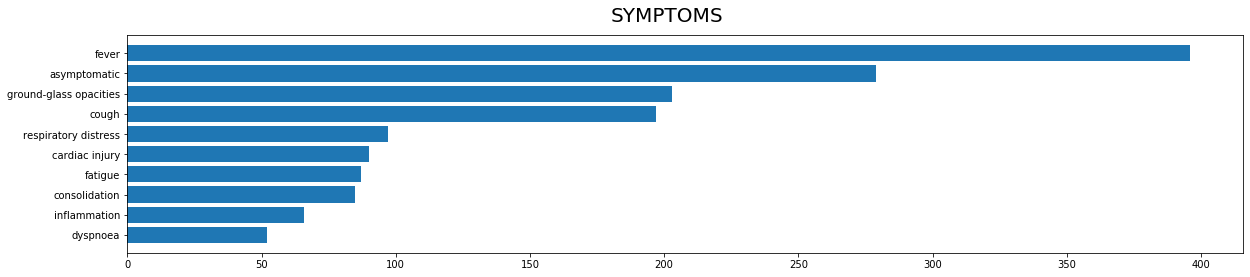

In [40]:
_topic = 'SYMPTOMS'
plot_dict(statistics_combinesyns[_topic], threshold=50 ,sort_values=True,barh=True, width=20, title=_topic)

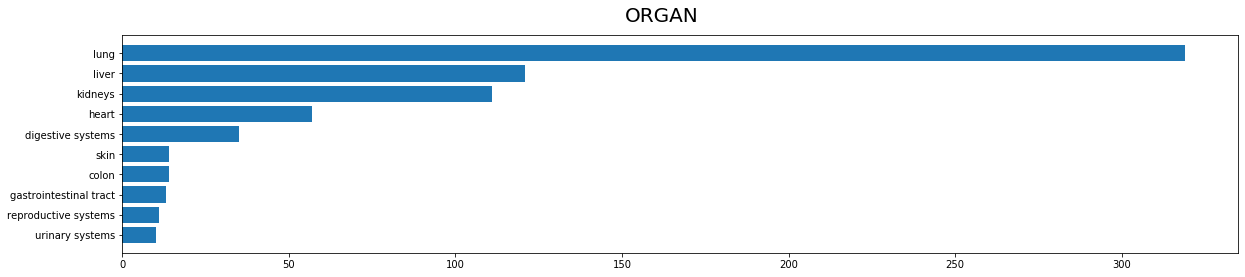

In [41]:
_topic = 'ORGAN'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True,barh=True, width=20, title=_topic)

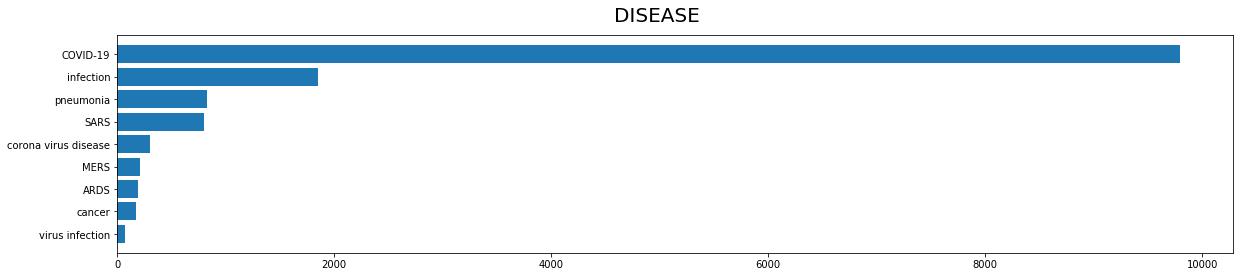

In [42]:
_topic = 'DISEASE'
plot_dict(statistics_combinesyns[_topic], threshold=50 ,sort_values=True,barh=True, width=20, title=_topic)

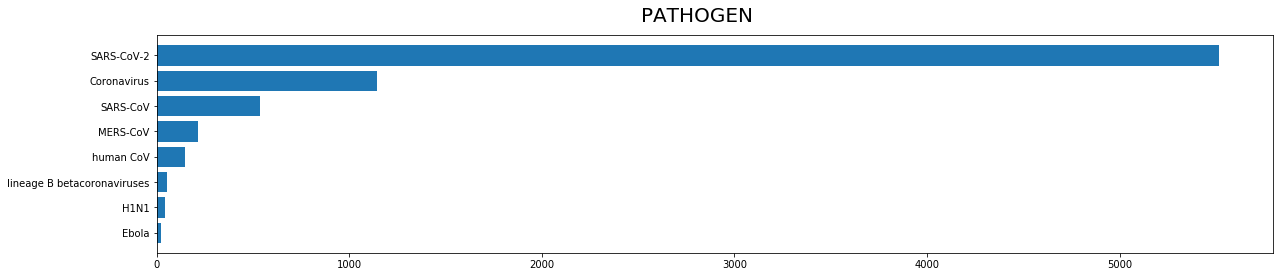

In [43]:
_topic = 'PATHOGEN'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

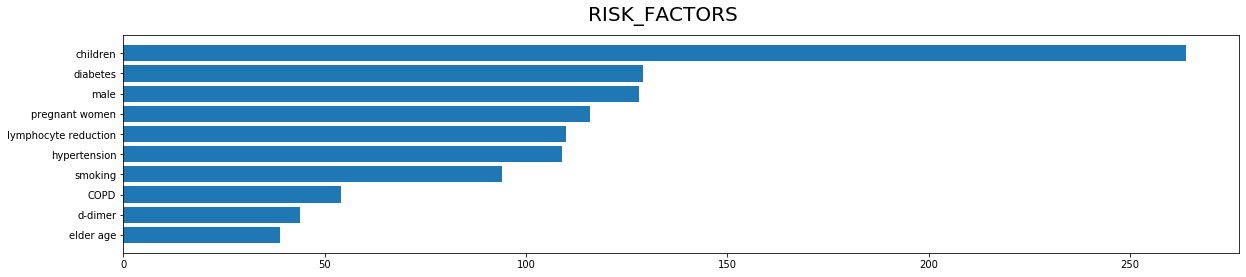

In [44]:
_topic = 'RISK_FACTORS'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

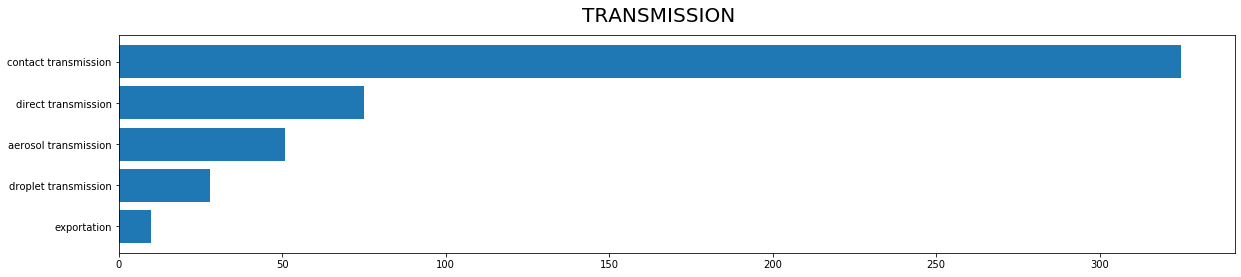

In [45]:
_topic = 'TRANSMISSION'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

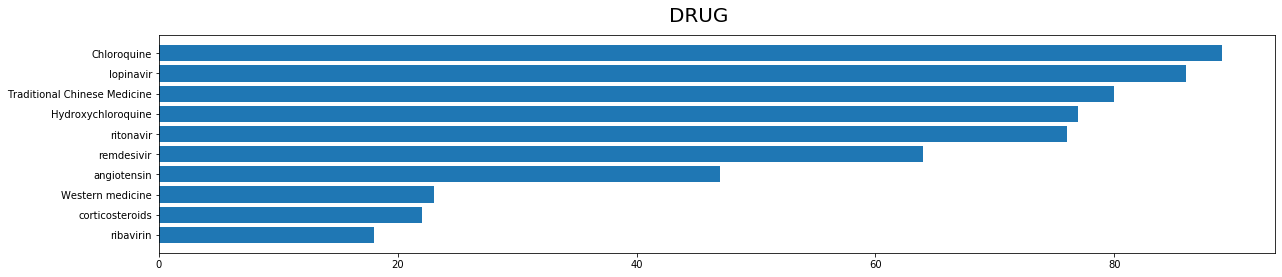

In [46]:
_topic = 'DRUG'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True,barh=True, width=20, title=_topic)

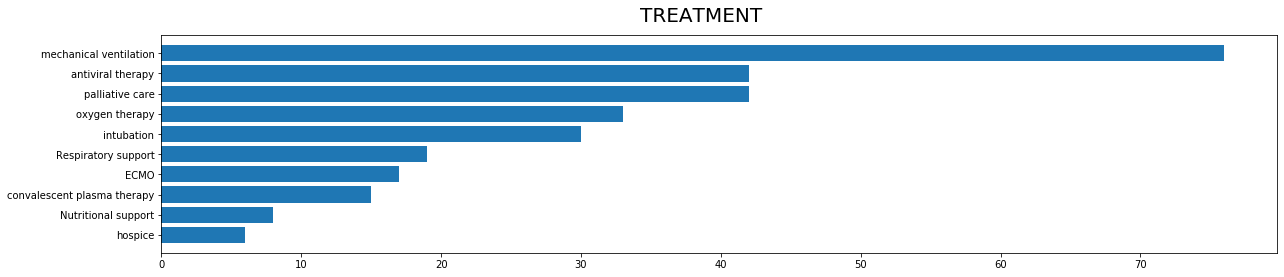

In [47]:
_topic = 'TREATMENT'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True,barh=True, width=20, title=_topic)

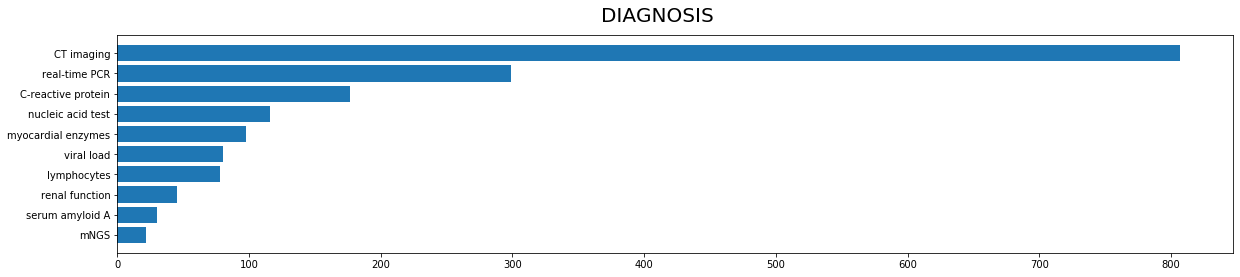

In [48]:
_topic = 'DIAGNOSIS'
plot_dict(statistics_combinesyns[_topic], threshold=20 ,sort_values=True,barh=True, width=20, title=_topic)

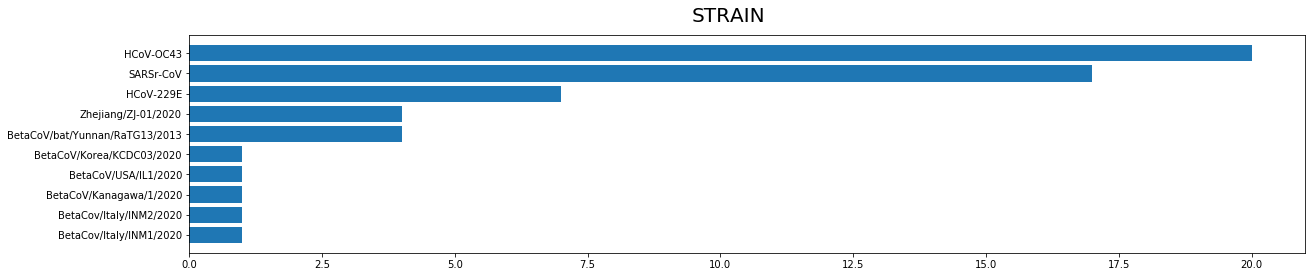

In [49]:
_topic = 'STRAIN'
plot_dict(statistics_combinesyns[_topic], threshold=1 ,sort_values=True,barh=True, width=20, title=_topic)

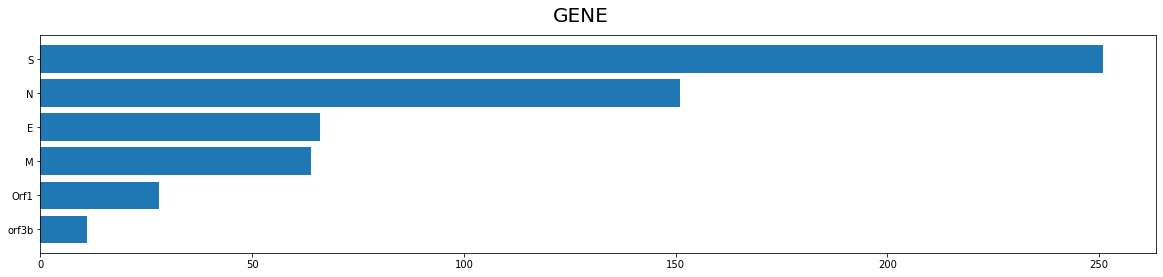

In [50]:
_topic = 'GENE'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

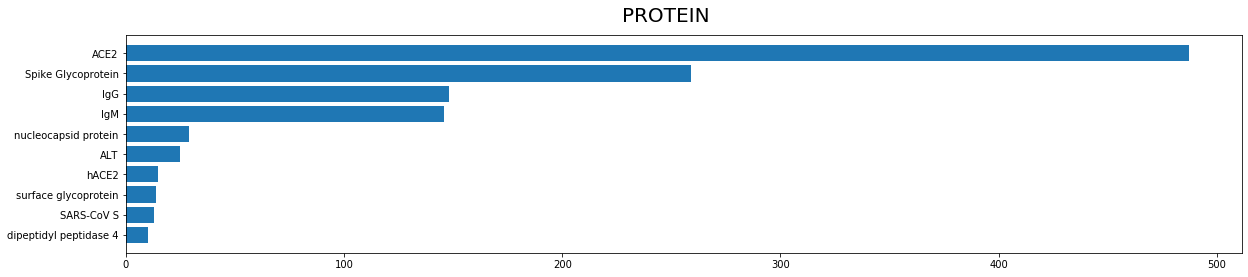

In [51]:
_topic = 'PROTEIN'
plot_dict(statistics_combinesyns[_topic], threshold=10 ,sort_values=True,barh=True, width=20, title=_topic)

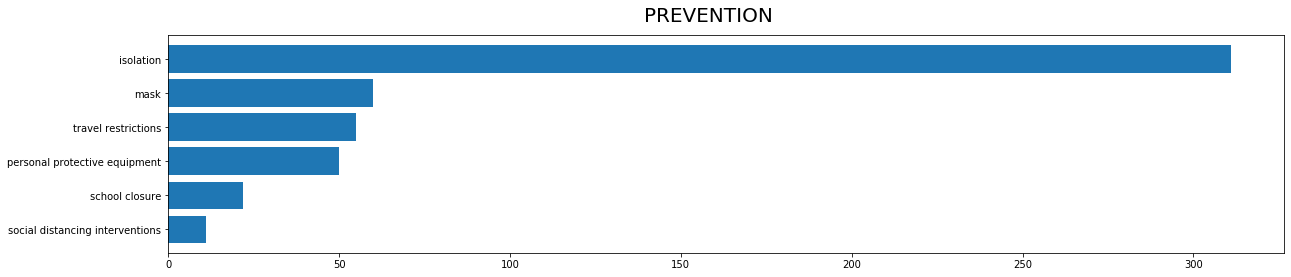

In [52]:
_topic = 'PREVENTION'
plot_dict(statistics_combinesyns[_topic], threshold=5 ,sort_values=True, barh=True, width=20, title=_topic)

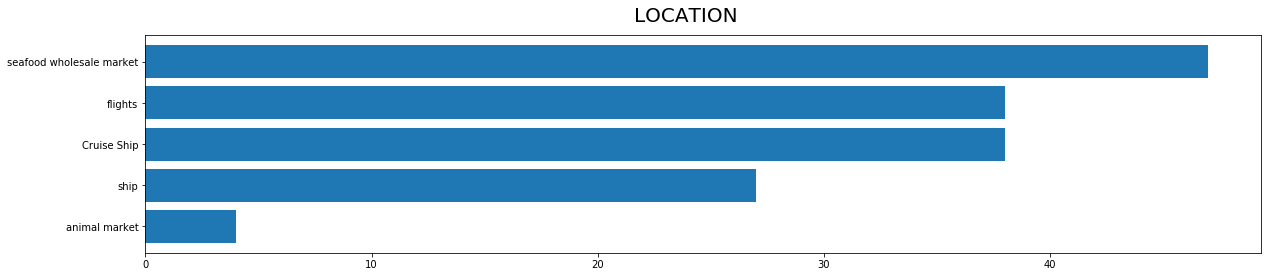

In [53]:
_topic = 'LOCATION'
plot_dict(statistics_combinesyns[_topic], threshold=2 ,sort_values=True, barh=True, width=20, title=_topic)

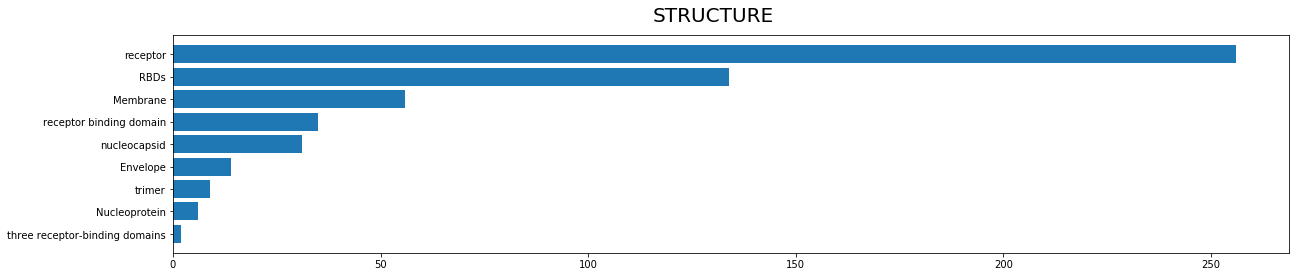

In [54]:
_topic = 'STRUCTURE'
plot_dict(statistics_combinesyns[_topic], threshold=2 ,sort_values=True, barh=True, width=20, title=_topic)

In [55]:
#define function filterbykeywords used to filter NER results.
#We only retain entity recognition results of COVID-19 papers whose texts contain 'keyword'
#return the filtered NER results in JSON format
def filterbykeywords(annojsonFile, keywords):
    f = open(annojsonFile, encoding='utf-8')
    filterjson = []
    for json_str in f.readlines():
        if json_str is not '':
            if len(keywords)==0:
                filterjson.append(json_str)
            else:
                myjson = json.loads(json_str)
                text = myjson["text"]
                if any(_word in text for _word in keywords):
                    filterjson.append(json_str)

    f.close()
    return filterjson

In [56]:
#Parse filtered NER json format, render HTML table dataframe
#sort by columns of "irredundant terms occurrence"(first descending) and "publish_time"(second descending)
#columns are ['cord_uid', 'related terms', 'irredundant terms occurrence', 'title+abstract', 'publish_time']
def correlated_articles(filterjson, topic):
    correlatedResultDict = {}
    
    for json_str in filterjson:
        if json_str is not '':
            myjson = json.loads(json_str)
            ents = myjson["ents"]
            cord_uid = myjson['title']
            correlatedResultDict[cord_uid] = {}
            correlatedResultDict[cord_uid]["text"] = myjson["text"]
            correlatedResultDict[cord_uid]["publish_time"] = myjson["publish_time"]
            correlatedResultDict[cord_uid]["terms"] = set()
            correlatedResultDict[cord_uid]["termsnum"] = 0
            correlatedResultDict[cord_uid]["posList"] = []
            for ent in ents:
                label_type = ent['label']
                start_char = ent['start']
                end_char = ent['end']
                label_text = correlatedResultDict[cord_uid]["text"][start_char:end_char]
                if topic.lower() == label_type.lower():
                    correlatedResultDict[cord_uid]["terms"].add(representation_dict[synonyms_dict[label_text.lower()]])
                    correlatedResultDict[cord_uid]["termsnum"]=len(correlatedResultDict[cord_uid]["terms"])
                    correlatedResultDict[cord_uid]["posList"].append((start_char, end_char))

    return correlatedResultDict

def getAnnotationHtml(text, posList, keywords):
    _prePos = 0
    annotationHtmlStr = ''
    for _pos in posList:
        annotationHtmlStr += text[_prePos:_pos[0]]
        annotationHtmlStr += " <font color='red'>" + text[_pos[0]:_pos[1]] + "</font> "
        _prePos = _pos[1]

    annotationHtmlStr += text[_prePos:]
    for _word in keywords:
        if _word is not '':
            annotationHtmlStr=annotationHtmlStr.replace(_word, " <font color='blue' style='font-weight:bold'>" + _word + "</font> ")
    return annotationHtmlStr

def get_answers(topic, keywords,top):
    filterjson = filterbykeywords(os.path.join(annotations_dir, "papers_anno.json"), keywords)
    print("All related papers number is: {}, we show top {} papers ordered by occurrences".format(len(filterjson), top))
    correlatedResultDict = correlated_articles(filterjson, topic)
    temp_sort_result = sorted(correlatedResultDict.items(), key=lambda x: x[1]["termsnum"], reverse=True)
    ranked_aswers = []
    pandasData = []
    for i in range(0,len(temp_sort_result)):
        if i>top:
            break
        rowData = []
        cord_uid = temp_sort_result[i][0]
        #print(cord_uid)
        annotationHtml = getAnnotationHtml(correlatedResultDict[cord_uid]["text"], correlatedResultDict[cord_uid]["posList"], keywords)
        rowData += [cord_uid, ', '.join(correlatedResultDict[cord_uid]["terms"]), correlatedResultDict[cord_uid]["termsnum"], annotationHtml,  correlatedResultDict[cord_uid]["publish_time"]]
        pandasData.append(rowData)
    '''
    for cord_uid in correlatedResultDict.keys():
        rowData = []
        annotationHtml = getAnnotationHtml(correlatedResultDict[cord_uid]["text"], correlatedResultDict[cord_uid]["posList"], keywords)
        rowData += [cord_uid, ', '.join(correlatedResultDict[cord_uid]["terms"]), correlatedResultDict[cord_uid]["termsnum"], annotationHtml,  correlatedResultDict[cord_uid]["publish_time"]]
        pandasData.append(rowData)
    '''
    #cord_uid, content, occurrence, related terms, publish_time
    question_HTML = '<div style="font-family: Times New Roman; font-size: 28px; padding-bottom:28px"><b>Topic</b>: ' + topic +'       <b>, Keywords</b>:'+(', ').join(keywords) + '</div>'
    display(HTML(question_HTML))
    df = pd.DataFrame(pandasData,
                      columns=['cord_uid', 'related terms', 'irredundant terms occurrence', 'title+abstract', 'publish_time'])
    df=df.sort_values(["irredundant terms occurrence", "publish_time"], ascending = (False, False))
    df = df.reset_index(drop=True)
    df_top10 = df.head(top)
    del df
    answers_HTML = df_top10.to_html(render_links=True, escape=False, justify ='left')#, formatters={'title+abstract': lambda x: '<b>' + x + '</b>'})
    answers_HTML = answers_HTML.replace('<td>','<td style="text-align: center;">')
    #print(answers_HTML)
    display(HTML(answers_HTML))

In [57]:
get_answers(topic='TRANSMISSION', keywords=['transmission','incubation','environmental stability'], top=2)

All related papers number is: 669, we show top 2 papers ordered by occurrences


In [58]:
get_answers(topic='RISK_FACTORS', keywords=['risk factor'], top=2)

All related papers number is: 89, we show top 2 papers ordered by occurrences


In [59]:
get_answers(topic='PATHOGEN', keywords=['recombination'], top=2)

All related papers number is: 24, we show top 2 papers ordered by occurrences


In [60]:
#Load the customed train data from json output
#loadjsonTrainData()
from __future__ import unicode_literals, print_function
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

TRAIN_DATA = []
TRAIN_LABELS = set()

def handleents(text, ents):
    handleddata=[]
    ss = text.split(". ")
    curr_text = ""
    curr_len = 0
    last_len = 0
    curr_ents = []
    for _s in ss:
        if _s is not "":
            curr_ents = []
            curr_text = _s
            curr_len = len(curr_text) + 2
            for _ent in ents:
                if _ent["end"] <= (curr_len + last_len) and _ent["start"] >= last_len:
                    TRAIN_LABELS.add(_ent["label"])
                    curr_ents.append((_ent["start"] - last_len, _ent["end"] - last_len, _ent["label"]))
            curr_ents.sort()
            last_len = last_len + curr_len
            handleddata.append((curr_text, {"entities": curr_ents}))
    return handleddata

def loadjsonTrainData(annotations_dir):
    with open(os.path.join(annotations_dir, "papers_anno_sample.json"), encoding="utf-8") as f:
        for json_str in f.readlines():
            if json_str is not '':
                myjson = json.loads(json_str)
                text = myjson["text"]
                cord_uid = myjson["title"]
                ents = myjson["ents"]
                handleddata = handleents(text, ents)
                TRAIN_DATA.extend(handleddata)

loadjsonTrainData(annotations_dir)

In [61]:
class TrainNer(object):
    def __init__(self, inmodel,outmodel,outmodel_dir,n_iter):
        self.inmodel=inmodel
        self.outmodel=outmodel
        self.outmodel_dir = outmodel_dir
        self.n_iter=n_iter

    def trainNer(self, TRAIN_DATA, TRAIN_LABELS):
        
        #Set up the pipeline and entity recognizer, and train the new entity.
        random.seed(0)
        if self.inmodel is not None:
            nlp = spacy.load(self.inmodel)  # load existing spaCy model
            print("Loaded model '%s'" % self.inmodel)
        else:
            nlp = spacy.blank("en")  # create blank Language class
            print("Created blank 'en' model")

        # Add entity recognizer to model if it's not in the pipeline
        # nlp.create_pipe works for built-ins that are registered with spaCy
        if "ner" not in nlp.pipe_names:
            ner = nlp.create_pipe("ner")
            nlp.add_pipe(ner)
        # otherwise, get it, so we can add labels to it
        else:
            ner = nlp.get_pipe("ner")

        # ner.add_label(LABEL)  # add new entity label to entity recognizer
        for _label in TRAIN_LABELS:
            if self.inmodel is not None:
                ner.add_label(_label)
            else:
                ner.add_label(_label)

        # _train_data may shuffle
        for_traindata = TRAIN_DATA.copy()

        if self.inmodel is None:
            optimizer = nlp.begin_training()
        else:
            optimizer = nlp.resume_training()
        move_names = list(ner.move_names)
        print(move_names)
        # get names of other pipes to disable them during training
        pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
        other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
        with nlp.disable_pipes(*other_pipes):  # only train NER
            sizes = compounding(1.0, 4.0, 1.001)
            # batch up the examples using spaCy's minibatch
            for itn in range(self.n_iter):
                random.shuffle(for_traindata)
                batches = minibatch(for_traindata, size=sizes)
                losses = {}
                for batch in batches:
                    _texts, annotations = zip(*batch)
                    nlp.update(_texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
                print("step {}, Losses {}".format(itn, losses))

        # save model to output directory
        if self.outmodel_dir is not None:
            output_dir = Path(self.outmodel_dir)
            if not output_dir.exists():
                output_dir.mkdir()
            nlp.meta["name"] = self.outmodel  # rename model
            nlp.to_disk(output_dir)
            print("Saved model to", output_dir)

In [62]:
trainner = TrainNer(None, "en_train_web_sm", "nermodel", 20)  # save the model name as "en_train_web_sm" and write to the ./nermodel dir
trainner.trainNer(TRAIN_DATA, TRAIN_LABELS) # Training based on the TRAIN_DATA

Created blank 'en' model
['O', 'B-ORGANIZATION', 'I-ORGANIZATION', 'L-ORGANIZATION', 'U-ORGANIZATION', 'B-STRUCTURE', 'I-STRUCTURE', 'L-STRUCTURE', 'U-STRUCTURE', 'B-GPE', 'I-GPE', 'L-GPE', 'U-GPE', 'B-LOCATION', 'I-LOCATION', 'L-LOCATION', 'U-LOCATION', 'B-DISEASE', 'I-DISEASE', 'L-DISEASE', 'U-DISEASE', 'B-DIAGNOSIS', 'I-DIAGNOSIS', 'L-DIAGNOSIS', 'U-DIAGNOSIS', 'B-TRANSMISSION', 'I-TRANSMISSION', 'L-TRANSMISSION', 'U-TRANSMISSION', 'B-PREVENTION', 'I-PREVENTION', 'L-PREVENTION', 'U-PREVENTION', 'B-SYMPTOMS', 'I-SYMPTOMS', 'L-SYMPTOMS', 'U-SYMPTOMS', 'B-DRUG', 'I-DRUG', 'L-DRUG', 'U-DRUG', 'B-RISK_FACTORS', 'I-RISK_FACTORS', 'L-RISK_FACTORS', 'U-RISK_FACTORS', 'B-ORGAN', 'I-ORGAN', 'L-ORGAN', 'U-ORGAN', 'B-TREATMENT', 'I-TREATMENT', 'L-TREATMENT', 'U-TREATMENT', 'B-HOST_OTHER', 'I-HOST_OTHER', 'L-HOST_OTHER', 'U-HOST_OTHER', 'B-PERCENT', 'I-PERCENT', 'L-PERCENT', 'U-PERCENT', 'B-HOST_HUMAN', 'I-HOST_HUMAN', 'L-HOST_HUMAN', 'U-HOST_HUMAN', 'B-GENE', 'I-GENE', 'L-GENE', 'U-GENE', 'B-PR

In [64]:
TRAIN_DATA

[('Highly Distinguished Amino Acid Sequences of 2019-nCoV (Wuhan Coronavirus)',
  {'entities': [(45, 54, 'PATHOGEN'), (62, 73, 'PATHOGEN')]}),
 ('Using a method for pathogen screening in DNA synthesis orders, we have identified a number of amino acid sequences that distinguish 2019-nCoV (Wuhan Coronavirus) from all other known viruses in Coronaviridae',
  {'entities': [(132, 141, 'PATHOGEN'), (149, 160, 'PATHOGEN')]}),
 ('We find three main regions of unique sequence: two in the 1ab polyprotein QHO60603.1, one in surface glycoprotein QHO60594.1',
  {'entities': [(8, 13, 'CARDINAL'),
    (47, 50, 'CARDINAL'),
    (86, 89, 'CARDINAL'),
    (93, 113, 'PROTEIN')]}),
 ('Hydroxychloroquine, a less toxic derivative of chloroquine, is effective in inhibiting SARS-CoV-2 infection in vitro',
  {'entities': [(0, 18, 'DRUG'), (47, 58, 'DRUG'), (87, 107, 'DISEASE')]}),
 ('Advance of Novel Coronavirus Registration Clinical Trial',
  {'entities': [(11, 28, 'PATHOGEN')]}),
 ('Background.This research 

In [65]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

class EvaluateNer(object):
    def __init__(self, nermodel_dir):
        self.ner_model = spacy.load(nermodel_dir)

    def evaluate(self, examples):
        scorer = Scorer()
        for input_, annot in examples:
            doc_gold_text = self.ner_model.make_doc(input_)
            gold = GoldParse(doc_gold_text, entities=annot["entities"])
            pred_value = self.ner_model(input_)
            scorer.score(pred_value, gold)
        return scorer.scores

In [66]:
evaluatener = EvaluateNer("nermodel") #nermodel
scores = evaluatener.evaluate(TRAIN_DATA)
#get the Precision, Recalling and F1 score
print("precision:{}\nrecalling:{}\nF1:{}".format(scores['ents_p'],scores['ents_r'],scores['ents_f']))

precision:97.6502557544757
recalling:98.0105888015402
F1:97.83009047962207
